# Vehicle CO2 Emission Analysis and Prediction
## 1. Introduction
The content of this project is similar to my previous job, which requires me to find the relationships between vehicle information (or other environmental parameters) and the gas emissions. The models of Regression and Classification are very powerful and useful tools for environmental data analysis. 
In this project:
 * From the components of a vehicle, estimate the CO2 Emissions with Regression and Classification models, assisting to predict the environmental impacts by the CO2 from different combined features of vehicles.
 * Analysis the relationship between numeric/non-numeric data and CO2 Emission, find the importance(weight) of features.
 * Optimize the prediction of CO2 Emissions by comparison and the application among advanced models.
 * It may also help customers to choose environmental-friendly vehicles quickly.
 

download the data set at the following link:

* [**Dataset Download Link**](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv)

See below for a detailed description of the dataset:

- **MODELYEAR:** Production Year of the vehicle model
- **MAKE:** The Brand of the vehicle
- **MODEL:** Model used by the vehicle
- **VEHICLECLASS:** Size and Type of the vehicle
- **ENGINESIZE:** Size of the Engine used in the vehicle
- **CYLINDERS:** It is the area that the piston travels, there are 7 types of cylinders here
- **TRANSMISSION:** The device automatically changes the gear ratio as the vehicle moves 
- **FUELTYPE:** Indicator of chemical compounds of the fuel
- **FUELCONSUMPTION_CITY:** The fuel consumption when driving the vehicle in cities, with uinit of L/100km
- **FUELCONSUMPTION_HWY:** The fuel consumption when driving the vehicle on highways, with uinit of L/100km
- **FUELCONSUMPTION_COMB:** The fuel consumption when driving in combine with ciities and highways, with uinit of L/100km
- **FUELCONSUMPTION_COMB_MPG:** FUELCONSUMPTION_COMB values converted with different unit: mile/gallon
- **CO2EMISSIONS:**: The Emissions of CO2 when driving the vehicle for a certain distance, with the unit of g CO2/km
    
**The primary goal is to understand what factors are best at predicting whether the features of vehicle related to its CO2 emission, and offer suggestions to operationalize those insights to help with the environmental problems

## 2. Data Preparation

### 2.1 Required Packages:

- pandas for data manipulation,

- matplotlib, Seaborn for data visualization,

- scipy for statistical Analysis

- sikit-learn for statistical modelling

- numpy for array manipulation

- datetime for time series analysis

- xgboost to perfom modelling using gradient boosted trees

In [1]:
# import libraries
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # inline plots with seaborn style
import scipy
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer,label_binarize
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

### 2.2 Data Examination and Cleaning

In [2]:
# download the data
url ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
file = wget.download(url)

100% [..............................................................................] 72629 / 72629

In [3]:
# check the data intergrity and validation (see if it includes errors, or unformated values, etc.)
df = pd.read_csv(file)
df.index.name = 'id'
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
id,,,,,,,,,,,,,
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# # check how many distinct items in each category
# for c in df.columns:
#     print("---- %s ---" % c)
#     print(df[c].value_counts())

In [5]:
# exame if there is any missing data
print(df.info())
print("-"*80)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

* 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION' and 'FUELTYPE' are categorical data, while the others are numeric data.

In [6]:
# also check for the duplicates
number_of_duplicates = df.duplicated().sum()
number_of_rows = df.shape[0]
print("{}% of the observations are duplicates.".format(round(number_of_duplicates/number_of_rows*100,1)))

0.0% of the observations are duplicates.


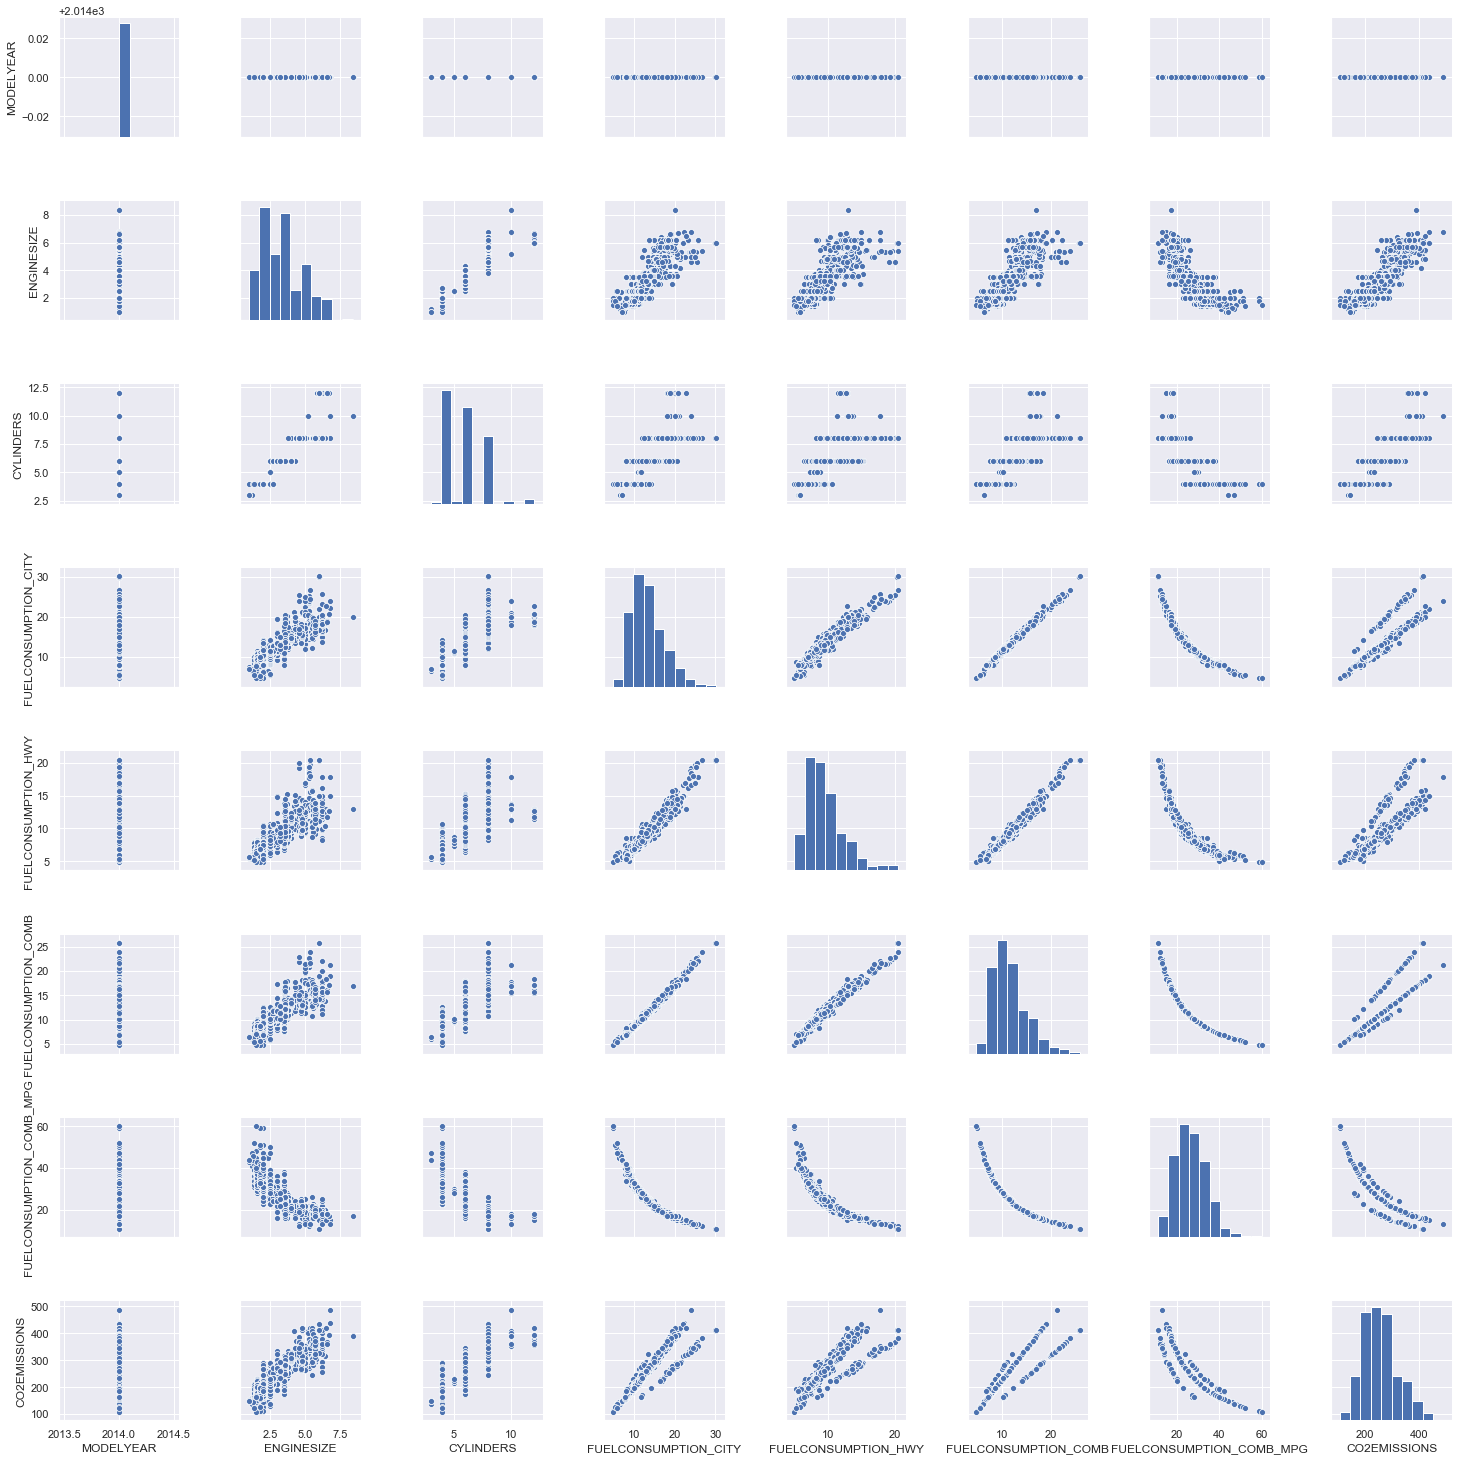

In [7]:
# take a first look at the possible relationships between each feature
sns.pairplot(df)

### A first impression of numeric features:
* All modelyear are 2014.
* trends in each row have very similar regress curves, except for the FUELCONSUMPTION_COMBO_MPG column.
* The EngineSize and Cylinders both seemed to closely relate to CO2 Emission, the higher their values, the more CO2 emissions.
* Cylinders vs. CO2 emission have a trend correlates to the sizes of Cylinder, but it doesn't look like linear relation but more like a classification. The reason why this trends is obviouse may be due to the clear order of Cylinder size.
* It means that the other attributes could have likely trends if their categories in a well-order.
* The EngineSize vs. CO2 emission is seemly a linear relation.

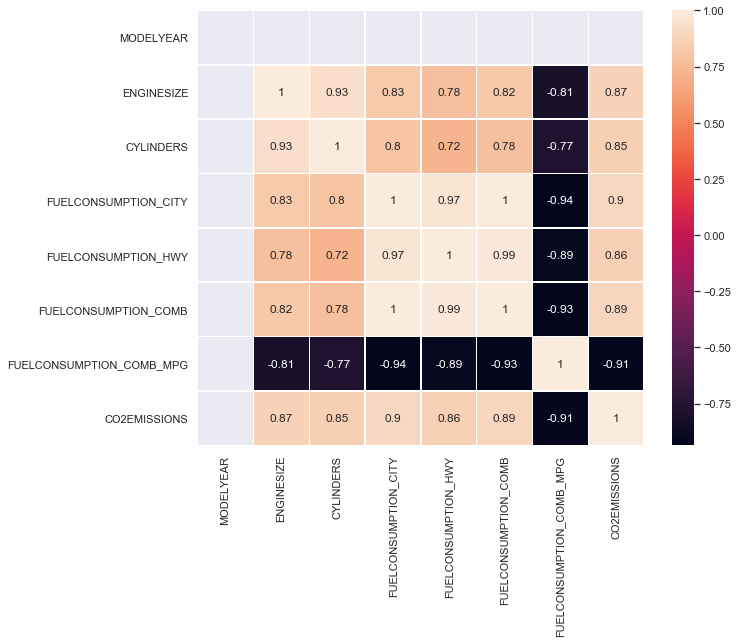

In [7]:
# Use correMatrix to find the relativity of these data
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corrMatrix, annot=True,linewidths=.5,annot_kws={"size": 12})

* FUELCONSUMPTION_COMB_MPG has negative relationships with other features and the target: CO2EMISSIONS

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [9]:
# Separate the date into categorical data and numeric data
categorical = ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION','FUELTYPE']
# Since ModelYear are the same in all rows, this feature could be ignore
numeric = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
           'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
target = ['CO2EMISSIONS']
categorical_df = df[categorical]
numeric_df = df[numeric]
target_df = df[target]

In [10]:
categorical_df.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
id,,,,,
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [11]:
# Encode the categorical data to numeric data for regression models
def transform(df_1,df_2):
    Encoder = LabelEncoder()
    for i in df_1:
        transform = Encoder.fit(df_2[i])
        df_2[i] = transform.transform(df_2[i])
transform(categorical,categorical_df)

In [12]:
categorical_df.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
id,,,,,
0,0,329,0,10,3
1,0,329,0,20,3
2,0,330,0,17,3
3,0,389,11,11,3
4,0,483,11,11,3


In [13]:
# plot every feature v.s. co2 emissions, check if there are abnormal data
def find_abnormal(df):
    f = plt.figure(figsize=(15,10))
    for i, column in enumerate(df.columns):
        ax = f.add_subplot(3,3,i+1)
        ax = sns.distplot(df[column])
        ax.set_title("feature of {}".format(i+1),fontsize=15)
    plt.subplots_adjust(wspace= 0.5, hspace = 0.5)

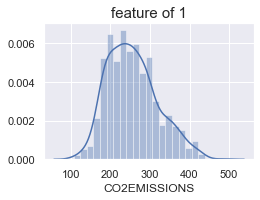

In [14]:
find_abnormal(target_df)

* No Abnormal values

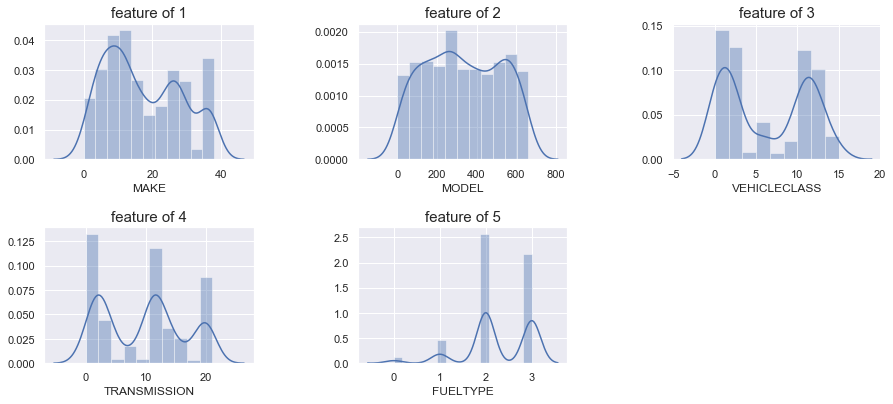

In [15]:
find_abnormal(categorical_df)

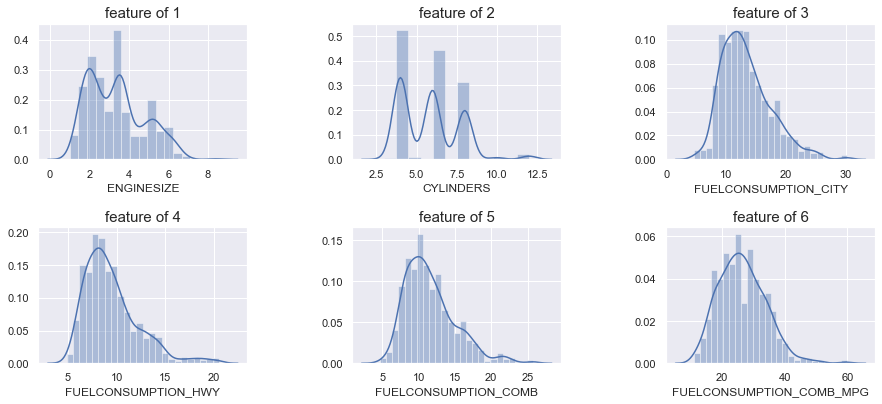

In [16]:
find_abnormal(numeric_df)

* All the features have no abnormal values, the data is ready for the models.

### 2.3 Data Standardization
* Variables that are measured at different scales do not contribute equally to the model fitting & model learned function 
* This might end up creating a bias. 
* Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.
* StandardScaler is one of the best tool to use for it, z = (x-mean)/std

In [17]:

def scaler(dataframe):
    scaler = StandardScaler()
    standardized = scaler.fit_transform(dataframe)
    new_df = pd.DataFrame(standardized,columns = dataframe.columns)
    return new_df

In [18]:
scaler(categorical_df)

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,-1.575452,-0.010685,-1.244334,0.049460,1.011148
1,-1.575452,-0.010685,-1.244334,1.548707,1.011148
2,-1.575452,-0.005382,-1.244334,1.098933,1.011148
3,-1.575452,0.307489,0.915493,0.199384,1.011148
4,-1.575452,0.805962,0.915493,0.199384,1.011148
...,...,...,...,...,...
1062,1.900538,1.553671,0.915493,0.199384,-0.373826
1063,1.900538,1.553671,0.915493,0.199384,-0.373826
1064,1.900538,1.558974,0.915493,0.199384,-0.373826
1065,1.900538,1.558974,0.915493,0.199384,-0.373826


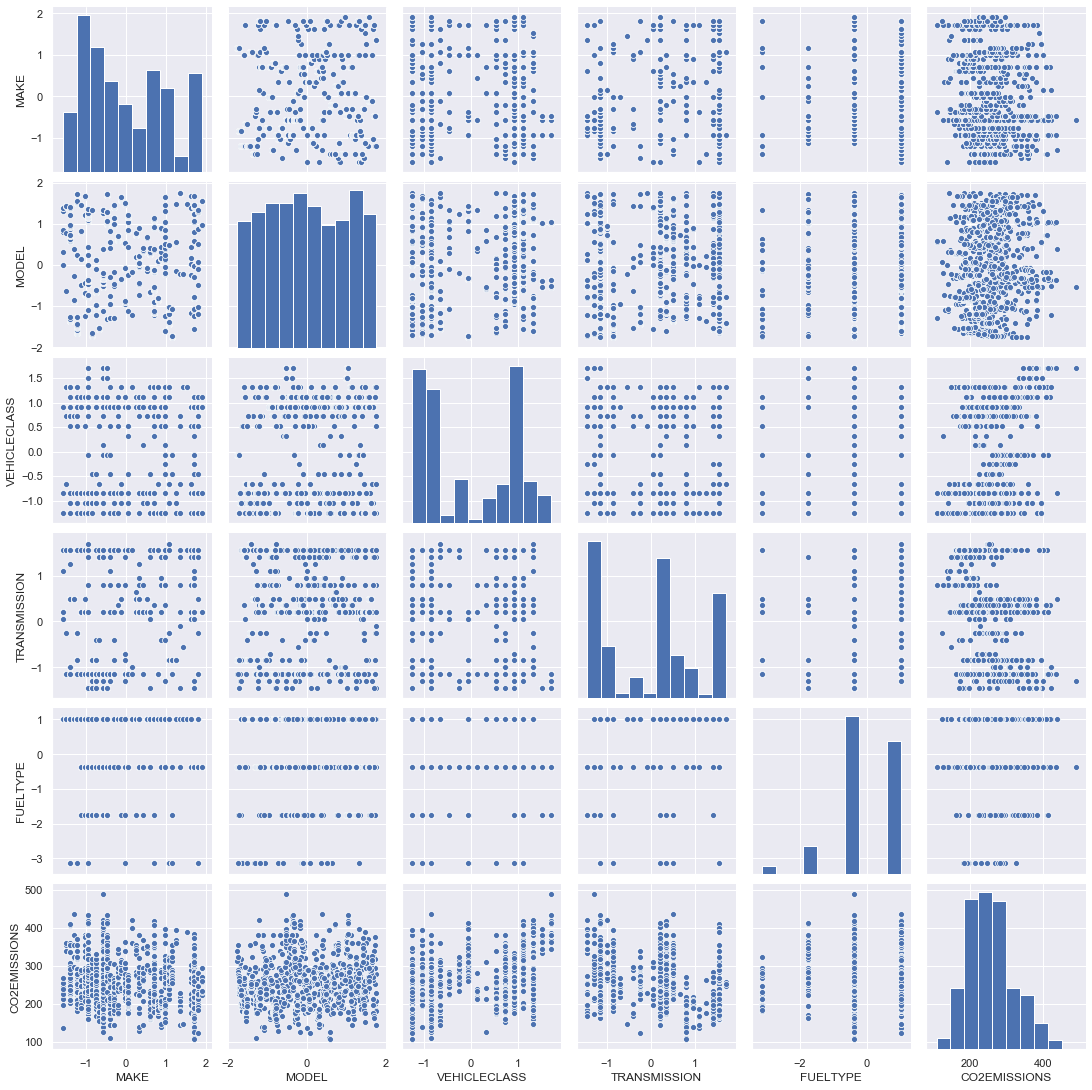

In [19]:
# now the numerical data is ready for fitting the models.
sns.pairplot(pd.concat([scaler(categorical_df),target_df], axis=1))

## 3. Regression model analysis

In [21]:
# standardize all the features, except for the target data
standardized_df = pd.concat([scaler(categorical_df),scaler(numeric_df),target_df], axis=1)
standardized_df.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-1.575452,-0.010685,-1.244334,0.049460,1.011148,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,196
1,-1.575452,-0.010685,-1.244334,1.548707,1.011148,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,221
2,-1.575452,-0.005382,-1.244334,1.098933,1.011148,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,136
3,-1.575452,0.307489,0.915493,0.199384,1.011148,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,255
4,-1.575452,0.805962,0.915493,0.199384,1.011148,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,244


In [22]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(standardized_df[standardized_df.columns.difference(['CO2EMISSIONS'])], 
                                                    standardized_df['CO2EMISSIONS'], 
                                                    test_size=0.2, random_state=2)

In [23]:
# check the size of the training and testing data
print(X_train.shape,X_test.shape)
print('-'*20)
print(y_train.shape,y_test.shape)

(853, 11) (214, 11)
--------------------
(853,) (214,)


### 3.1 Model Selection

In [24]:
# Creating a Function to append the cross validation scores of the algorithms
# cross_val_score is used to examine the training data before fitting into models
# this could save a lot of time on finding the best model

Model = []
RMSE = []
MAE = []
R_2 = []
cv = KFold(8, random_state = 1) # 8 KFold should be enough for avoding overfitting


def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error').mean()))
    MAE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, scoring='neg_mean_absolute_error').mean()))
    R_2.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [25]:
names = ['Linear Regression', 'SGD Regressor', 'Ridge Regression', 'Lasso Regression', 
         'K Neighbors Regressor', 'Decision Tree Regressor', 'Extra Trees Regressor',
         'Random Forest Regressor', 'Gradient Boosting Regressor', 'Adaboost Regressor']
models = [LinearRegression(), SGDRegressor(), Ridge(), Lasso(), KNeighborsRegressor(), 
          DecisionTreeRegressor(), ExtraTreesRegressor(), RandomForestRegressor(), 
          GradientBoostingRegressor(), AdaBoostRegressor()]

In [26]:
#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

In [27]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'MAE': MAE,
                           'R Squared': R_2})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,MAE,R Squared
0,Linear Regression,20.234852,3.773373,0.892730
1,SGD Regressor,20.238532,3.779339,0.892944
2,Ridge Regression,20.233039,3.772374,0.892755
3,Lasso Regression,20.269561,3.751415,0.892335
4,K Neighbors Regressor,13.959540,3.171384,0.948797
5,Decision Tree Regressor,8.888570,1.140331,0.976389
6,Extra Trees Regressor,5.089825,1.038802,0.993443
7,Random Forest Regressor,7.782941,1.341496,0.984919
8,Gradient Boosting Regressor,4.731401,1.643800,0.993930
9,Adaboost Regressor,14.592041,3.301373,0.945999


* Gradient Boosting Regressor wins with its lowest RMSE and highest R_2 score.
* Extra Trees Regressor and Random Forest Regressor with close scores to Gradient Boosting Regressor. 
* All of them have the potentials to perform much better if with good hyper parameter, need to do deeper comparation.

### 3.2 Models Comparison

In [29]:
# Search for the best parameter 
# for many fits with hyperparameters, randomizedSearch perform much faster than Gridsearch
# I need the model to be as accurate as possible so here use the randomizedSearch
def param_select(model,model_param_grid):
    # Perform random search: randomized_mse using RandomizedSearchCV of sklearn
    randomized_mse = RandomizedSearchCV(estimator=model, param_distributions=model_param_grid,
                                    n_iter=200, cv=3, scoring='neg_mean_squared_error',verbose=1)
    randomized_mse.fit(X_train, y_train)

    # Print the best parameters and lowest RMSE
    print("Best parameters found: ",randomized_mse.best_params_)
    print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

#### 3.2.1 Extra Trees Model

In [123]:
model_etr = ExtraTreesRegressor()
model_param_grid_etr = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'oob_score': [True,False],
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select(model_etr,model_param_grid_etr)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.0min finished


Best parameters found:  {'oob_score': False, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Lowest RMSE found:  6.59690998252239


#### 3.2.2 Gradient Boosting Model

In [44]:
# Instantiate the regressor
model_gbr = GradientBoostingRegressor()
model_param_grid_gbr = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select(model_gbr,model_param_grid_gbr)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.4min finished


Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 2}
Lowest RMSE found:  5.704496680188545


#### 3.2.3 Random Forest Model

In [47]:
model_dcr = RandomForestRegressor()
model_param_grid_dcr = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'oob_score': [True,False],
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select(model_dcr,model_param_grid_dcr)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.0min finished


Best parameters found:  {'oob_score': False, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 9}
Lowest RMSE found:  8.631652411814416


#### 3.2.4 XGBoosting Model

* XGBoosting model is a advanced mode to GBDT, with optimized performance, it may get better prediction than GBDT
* Here include the XGB model for comparison

In [49]:
model_xgbr = XGBRegressor(silent = True)
model_param_grid_xgbr = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'bootstrap': [True,False],
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select(model_xgbr,model_param_grid_xgbr)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.6min finished


Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 2, 'bootstrap': False}
Lowest RMSE found:  6.13686355076767


### 3.3 Model ploting and selecting

In [34]:
Model_name = ['Extra Trees','Gradient Boosting','Random Forest','XGBoosting']
Model_reg = [ExtraTreesRegressor(max_depth=10,n_estimators=1000,min_samples_split=2,
                                   min_samples_leaf=1,random_state=1),
             GradientBoostingRegressor(max_depth=2,n_estimators=1000,min_samples_split=6,
                                   min_samples_leaf=5,random_state=11),
             RandomForestRegressor(max_depth=9,n_estimators=200,min_samples_split=2,
                                   min_samples_leaf=2,random_state=22),
             XGBRegressor(max_depth=3,n_estimators=1000,bootstrap=False,
                          min_samples_split=10,min_samples_leaf=4,silent = True,random_state=33)
             ]
RMSE_score = []
MAE_score = []
R_2_score = []

def compare(X_train,y_train,X_test,y_test):
    for i in range(len(Model_name)):
        Model_reg[i].fit(X_train, y_train)
        y_pred = Model_reg[i].predict(X_test)
        RMSE_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        MAE_score.append(mean_absolute_error(y_test, y_pred))
        R_2_score.append(r2_score(y_test, y_pred))
        feature_scores = pd.Series(Model_reg[i].feature_importances_, index=X_train.columns).sort_values(ascending=False)
        
        f = plt.figure(figsize=(25,30))
        ax = f.add_subplot(431)
        ax = sns.barplot(x=feature_scores, y=feature_scores.index)
        ax.set_title("Feature scores of {}".format(Model_name[i]),fontsize=20)
        ax.set_yticklabels(feature_scores.index,fontsize=12)
        ax.set_xlabel("Feature importance score",fontsize=20)
        ax.set_ylabel("Features",fontsize=15)
       
        ax = f.add_subplot(432)
        ax = sns.scatterplot(y_test,y_test,ax=ax,color='red',label='Test')
        ax = sns.lineplot(y_test,y_pred,ax=ax,color='blue',label='Predict')
        ax.set_title('Check for Linearity of {}:\n Actual Vs Predicted value'.format(Model_name[i]),fontsize=20)
        
        ax = f.add_subplot(433)
        ax = sns.distplot((y_test - y_pred),ax=ax,kde_kws={'bw':1.0},color='b')
        ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
        ax.set_title('Check for {} \n Residual normality & mean: Residual eror'.format(Model_name[i]),fontsize=20)
        
        plt.show()

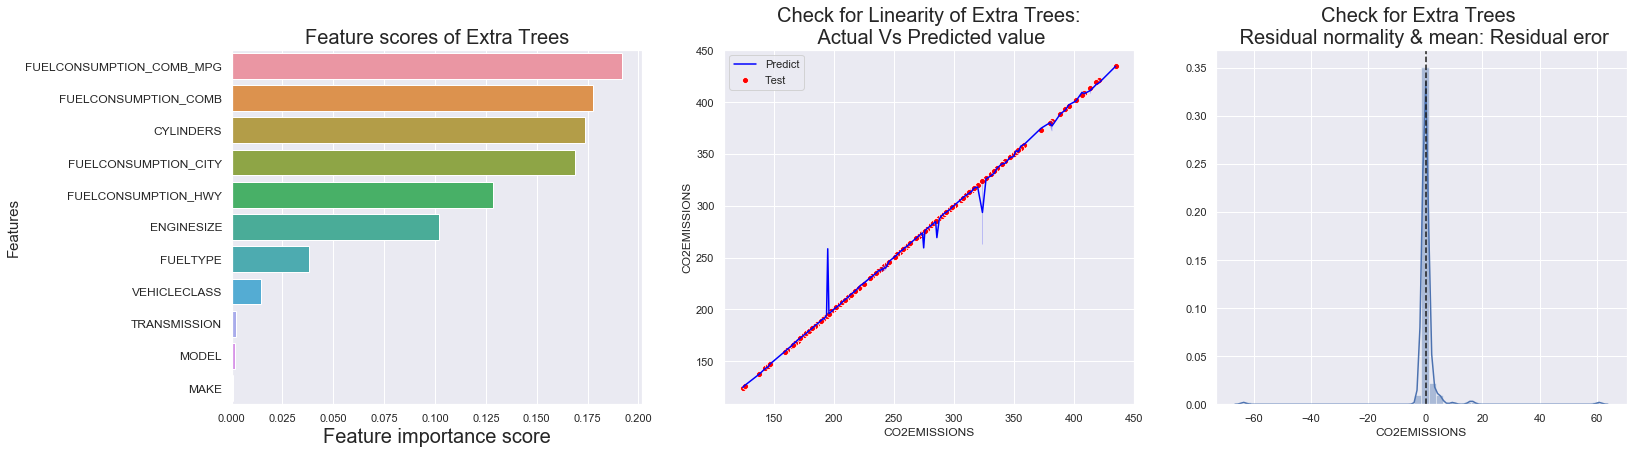

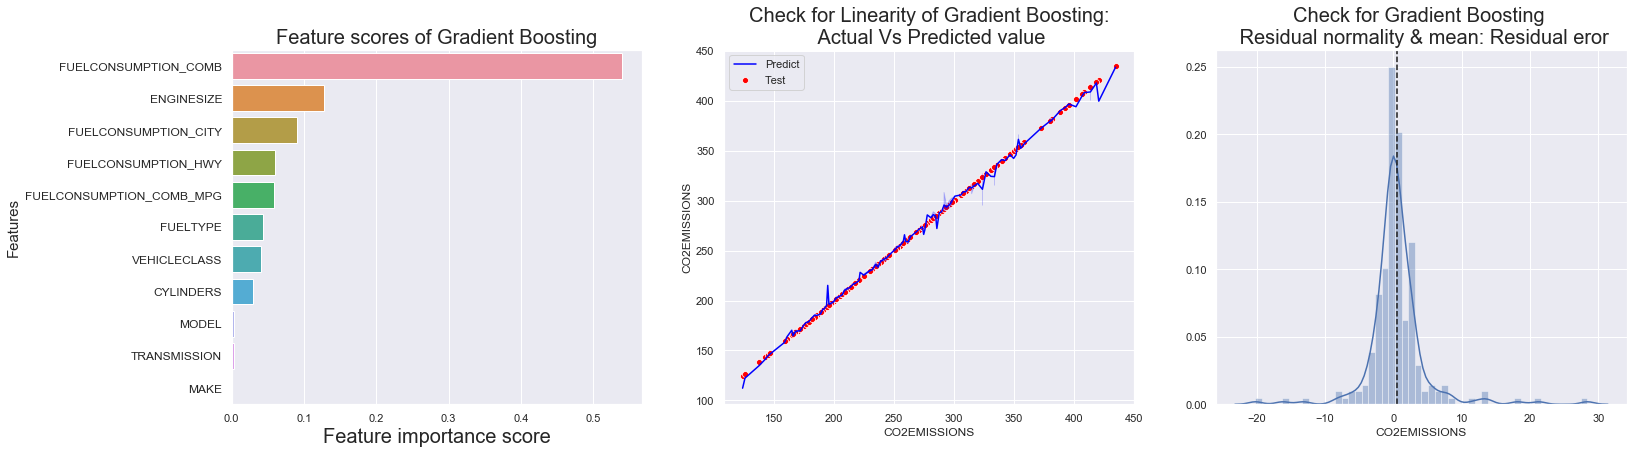

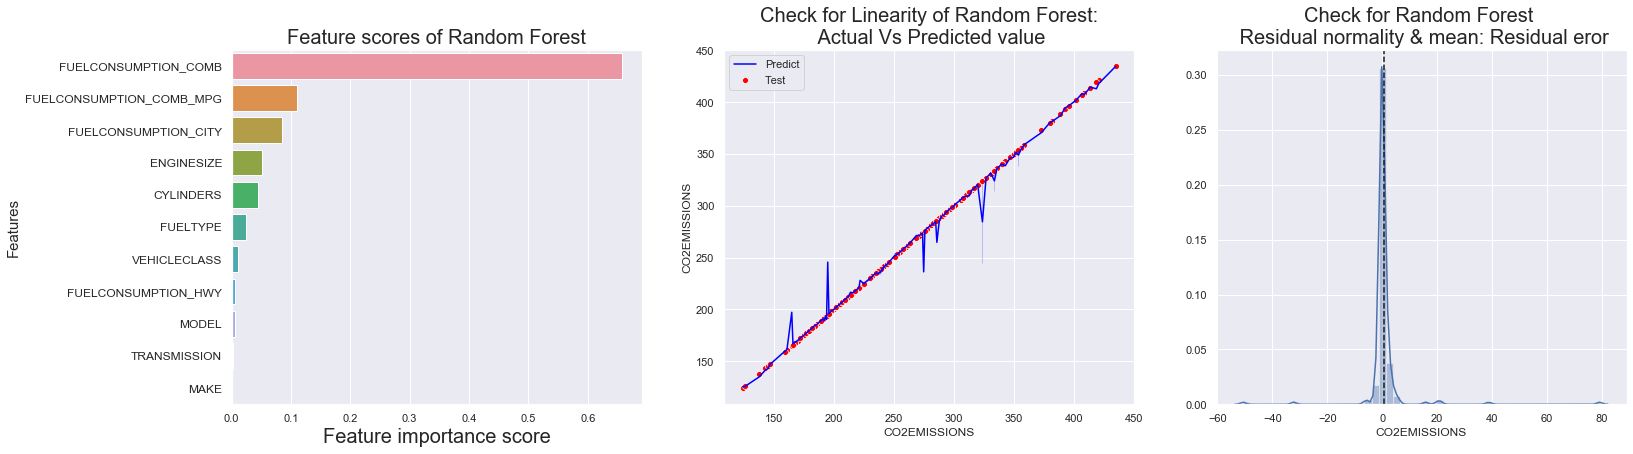

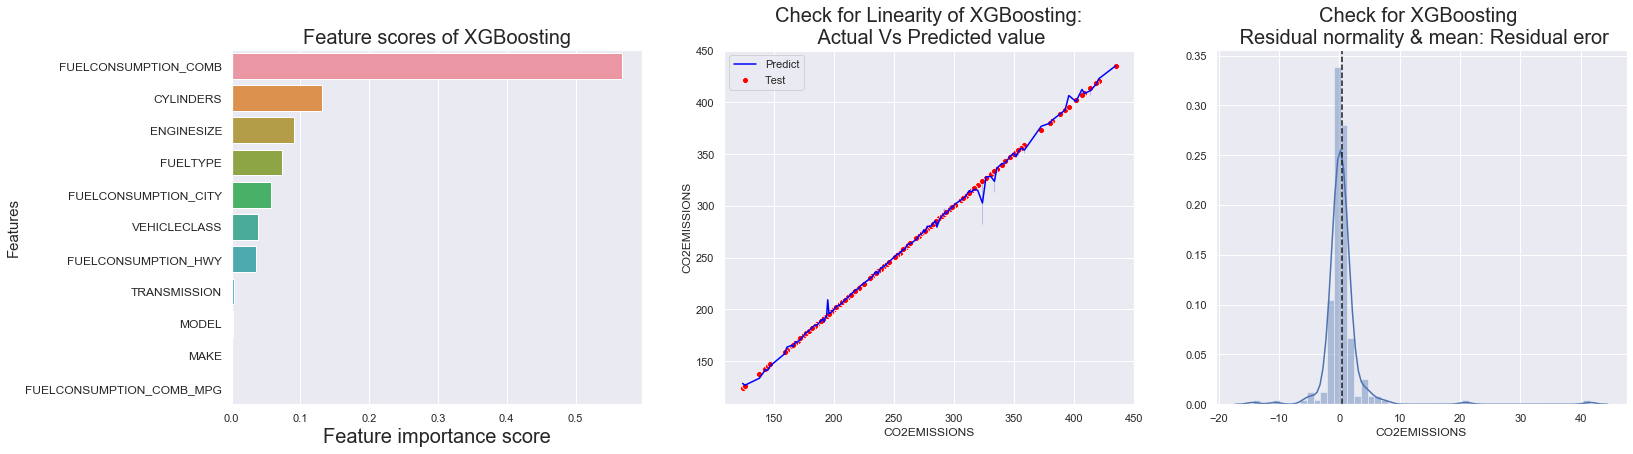

In [35]:
compare(X_train,y_train,X_test,y_test)

### Model Explanation
* The Extra Trees Model has the best stability due to its more balanced weights on each feature (feature importance), which means this model could reward reliable prediction even if there are abrupt impacts on 'FUELCONSUMPTION_COMB'. And This model also has well linearity between predict value and actual value. Thus, Extra Tree Model is the best choice for validation.
* Gradient Boosting and XGBoosting models are both perform better than others for they both return smooth linearity curves on Actual Vs Predicted value.
* All of the four models have their residual in normal distribution, they all be useful for this case.

In [36]:
# Print the prediction socres
Comparison = pd.DataFrame({'Model': Model_name,
                           'RMSE': RMSE_score,
                           'MAE': MAE_score,
                           'R Squared': R_2_score})
print("FOLLOWING ARE THE SCORES: ")
Comparison

FOLLOWING ARE THE SCORES: 


,Model,RMSE,MAE,R Squared
0,Extra Trees,6.335007,1.278283,0.991333
1,Gradient Boosting,4.461795,2.434106,0.995701
2,Random Forest,7.745957,1.892659,0.987043
3,XGBoosting,3.798974,1.492364,0.996883


* The Best model should be XGBoosting and Gradient Boosting for their higher R2 Scores and relative lower RMSE

## 4. Classification Models

* Similar to Regression models, classification models evaluate the performance by the statistics socres and comparison
* In addition, the classification have to divid numeric data into 'group' that encode by their mathematic distance and similarity, so as to put numeric number to labeled 'categry' boxes.

In [37]:
numeric_df_2 = numeric_df.copy()
target_df_2 = target_df.copy()

In [42]:
# KBinsDiscretizer is the tool to group up numeric numbers
def binsdiscretizer(df,n):
    enc = KBinsDiscretizer(n_bins=n, encode='ordinal', strategy='kmeans')
    df_value = df.values
    df_value = enc.fit_transform(df_value)
    return pd.DataFrame(df_value,columns = df.columns)
binsdiscretizer(numeric_df_2,10).head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,1.0,1.0,1.0,0.0,1.0,4.0
1,1.0,1.0,2.0,1.0,2.0,3.0
2,0.0,1.0,0.0,0.0,0.0,7.0
3,3.0,3.0,3.0,2.0,3.0,2.0
4,3.0,3.0,2.0,2.0,2.0,3.0


In [43]:
discretizer_df = pd.concat([categorical_df, binsdiscretizer(numeric_df_2,10),
                            binsdiscretizer(target_df_2,10)], axis=1)
discretizer_df.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,10,3,1.0,1.0,1.0,0.0,1.0,4.0,2.0
1,0,329,0,20,3,1.0,1.0,2.0,1.0,2.0,3.0,2.0
2,0,330,0,17,3,0.0,1.0,0.0,0.0,0.0,7.0,0.0
3,0,389,11,11,3,3.0,3.0,3.0,2.0,3.0,2.0,3.0
4,0,483,11,11,3,3.0,3.0,2.0,2.0,2.0,3.0,3.0


In [40]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(discretizer_df[discretizer_df.columns.difference(['CO2EMISSIONS'])], 
                                                    discretizer_df['CO2EMISSIONS'], 
                                                    test_size=0.2, random_state=52)

In [41]:
print(Xc_train.shape,Xc_test.shape)
print('-'*20)
print(yc_train.shape,yc_test.shape)

(853, 11) (214, 11)
--------------------
(853,) (214,)


### 4.1 Model Selection

In [58]:
Model_2 = []
Accuracy = []
F_1_Macro = []
F_1_Micro = []
Precision_Macro = []
Precision_Micro = []

cv = KFold(8, random_state = 1) # 8 KFold should be enough for avoding overfitting

#Creating a Function to append the cross validation scores of the algorithms
def classifier_scores(name, model, x, y):
    Model_2.append(name)
    Accuracy.append(cross_val_score(model, x, y, cv=cv, scoring='accuracy').mean())
    F_1_Macro.append(cross_val_score(model, x, y, cv=cv, scoring='f1_macro').mean())
    F_1_Micro.append(cross_val_score(model, x, y, cv=cv, scoring='f1_micro').mean())
    Precision_Macro.append(cross_val_score(model, x, y, cv=cv, scoring='precision_macro').mean())
    Precision_Micro.append(cross_val_score(model, x, y, cv=cv, scoring='precision_micro').mean())
    

In [59]:
names_2 = ['Support Vector Machine', 'ExtraTrees Classifier', 'Decision Tree Classifier',  
         'RandomForest Classifier', 'Gradient Boosting Classifier', 
         'Adaboost Classifier','K Neighbors Classifier','SGD Classifier']
models_2 = [SVC(), ExtraTreesClassifier(), DecisionTreeClassifier(),
          RandomForestClassifier(), GradientBoostingClassifier(),
          AdaBoostClassifier(), KNeighborsClassifier(), SGDClassifier()]

In [60]:
#Running all algorithms
for name, model in zip(names_2, models_2):
    classifier_scores(name, model, Xc_train, yc_train)

In [61]:
analysis = pd.DataFrame({'Model': Model_2,
                        'Accuracy': Accuracy,
                        'F_1_Macro': F_1_Macro,
                        'F_1_Micro': F_1_Micro,
                        'Precision_Macro': Precision_Macro,
                        'Precision_Micro': Precision_Micro})
print("FOLLOWING ARE THE TRAINING SCORES: ")
analysis

FOLLOWING ARE THE TRAINING SCORES: 


,Model,Accuracy,F_1_Macro,F_1_Micro,Precision_Macro,Precision_Micro
0,Support Vector Machine,0.241503,0.074374,0.241503,0.054258,0.241503
1,ExtraTrees Classifier,0.847635,0.884836,0.847635,0.899657,0.847657
2,Decision Tree Classifier,0.818396,0.829980,0.813756,0.840369,0.819609
3,RandomForest Classifier,0.857047,0.866285,0.850026,0.869057,0.853509
4,Gradient Boosting Classifier,0.844207,0.863026,0.838322,0.871841,0.845376
5,Adaboost Classifier,0.492495,0.265010,0.492495,0.228275,0.492495
6,K Neighbors Classifier,0.437291,0.412536,0.437291,0.481955,0.437291
7,SGD Classifier,0.274268,0.111719,0.245151,0.176387,0.246352


* Extra Trees Classifier has the highest F1_Macro, F1_Micro and Precision_Macro scores and relative high Precision Micro Score, therefore this model is the first choice for classification.
* Random Forest Classifier and Gradient Boosting Classifier are both good in all the scores, just slight lower than Extra Trees, so these two models should be included to comparison. 

### 4.2 Model Comparison

In [44]:
def param_select_classifier(model,model_param_grid):
    # Perform random search: grid_mse
    randomized_f1 = RandomizedSearchCV(estimator=model, param_distributions=model_param_grid,
                                    n_iter=200, cv=3, scoring='f1_micro',verbose=1)
    randomized_f1.fit(Xc_train, yc_train)

    # Print the best parameters and lowest RMSE
    print("Best parameters found: ",randomized_f1.best_params_)
    print("F_1 found: ", randomized_f1.best_score_)

#### 4.2.1 Extra Trees Model

In [65]:
model_etc = ExtraTreesClassifier()
model_param_grid_etc = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'oob_score': [True,False],
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select_classifier(model_etc,model_param_grid_etc)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.2min finished


Best parameters found:  {'oob_score': False, 'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10}
F_1 found:  0.8581747796721851


#### 4.2.2 Random Forest Model

In [66]:
model_rfc = RandomForestClassifier()
model_param_grid_rfc = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'oob_score': [True,False],
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select_classifier(model_rfc,model_param_grid_rfc)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  6.0min finished


Best parameters found:  {'oob_score': False, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8}
F_1 found:  0.8441026274606704


#### 4.2.3 Gradient Boosting Model

In [67]:
model_gbc = GradientBoostingClassifier()
model_param_grid_gbc = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select_classifier(model_gbc,model_param_grid_gbc)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 24.8min finished


Best parameters found:  {'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 9}
F_1 found:  0.8476072811135821


#### 4.2.1 XGBoosting Model (like it previously used in regression model)

In [68]:
model_xgbc = XGBClassifier(silent = True)
model_param_grid_xgbc = {'n_estimators': range(0,1200,200),
                        'max_depth': range(2,12),
                        'min_samples_split': range(1,11),
                        'min_samples_leaf': range(1,11)}
param_select_classifier(model_xgbc,model_param_grid_xgbc)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 14.2min finished


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 2}
F_1 found:  0.8347047195453423


### 4.3 Model ploting and selecting

In [45]:
Model_clf_name = ['Extra Trees','Random Forest','Gradient Boosting','XGBoosting']
Model_clf = [ExtraTreesClassifier(oob_score=False, n_estimators=800, 
                                 min_samples_split=4, min_samples_leaf=1, 
                                 max_depth=10, random_state=44),
             RandomForestClassifier(oob_score=False, n_estimators=200, 
                                    min_samples_split=3, min_samples_leaf=1, 
                                    max_depth=8,random_state=55),
             GradientBoostingClassifier(n_estimators=400, 
                                    min_samples_split=3, min_samples_leaf=2, 
                                    max_depth=9, random_state=66),
             XGBClassifier(n_estimators=200, 
                                    min_samples_split=8, min_samples_leaf=2, 
                                    max_depth=2, random_state=77)
             ]
Roc_Auc_Macro = []
F1_Macro = []
F1_Micro = []

def compare_clf(X_train,y_train,X_test,y_test):
    for i in range(len(Model_clf_name)):
        Model_clf[i].fit(X_train, y_train)
        y_pred = Model_clf[i].predict_proba(X_test)
        y_one_hot = label_binarize(y_test,np.arange(y_test.size)) # covert to one_hot code for roc_auc
        Roc_Auc_Macro.append(roc_auc_score(y_one_hot, y_pred, average = 'macro',multi_class='ovr'))
        # for multi_class f1 score, the value have to be reformated to 1-D shape
        # because Classification metrics can't handle a mix of multiclass and continuous-multioutput targets
        # reference: https://github.com/kk7nc/Text_Classification/issues/8
        F1_Macro.append(f1_score(y_test, np.argmax(y_pred, axis = 1), average = 'macro'))  
        F1_Micro.append(f1_score(y_test, np.argmax(y_pred, axis = 1), average = 'micro'))
        clf_report = classification_report(y_test,np.argmax(y_pred, axis = 1),output_dict=True)
        feature_scores = pd.Series(Model_clf[i].feature_importances_, index=X_train.columns).sort_values(ascending=False)
        
        f = plt.figure(figsize=(25,30))
        ax = f.add_subplot(431)
        ax = sns.barplot(x=feature_scores, y=feature_scores.index)
        ax.set_title("Feature scores of {}".format(Model_clf_name[i]),fontsize=20)
        ax.set_yticklabels(feature_scores.index,fontsize=12)
        ax.set_xlabel("Feature importance score",fontsize=15)
        ax.set_ylabel("Features",fontsize=15)
       
        ax = f.add_subplot(432)
        ax = sns.scatterplot(y_test,y_test,ax=ax,color='red',label = 'Test')
        ax = sns.lineplot(y_test,np.argmax(y_pred, axis = 1),ax=ax,color='blue',label='Predict')
        ax.set_title('Check for Linearity of {}:\n Actual Vs Predicted value'.format(Model_clf_name[i]),fontsize=20)
        
        ax = f.add_subplot(433)
        ax.set_title('Check for Confusion Matrix \n of {}'.format(Model_clf_name[i]),fontsize=20)
        ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

        plt.show()

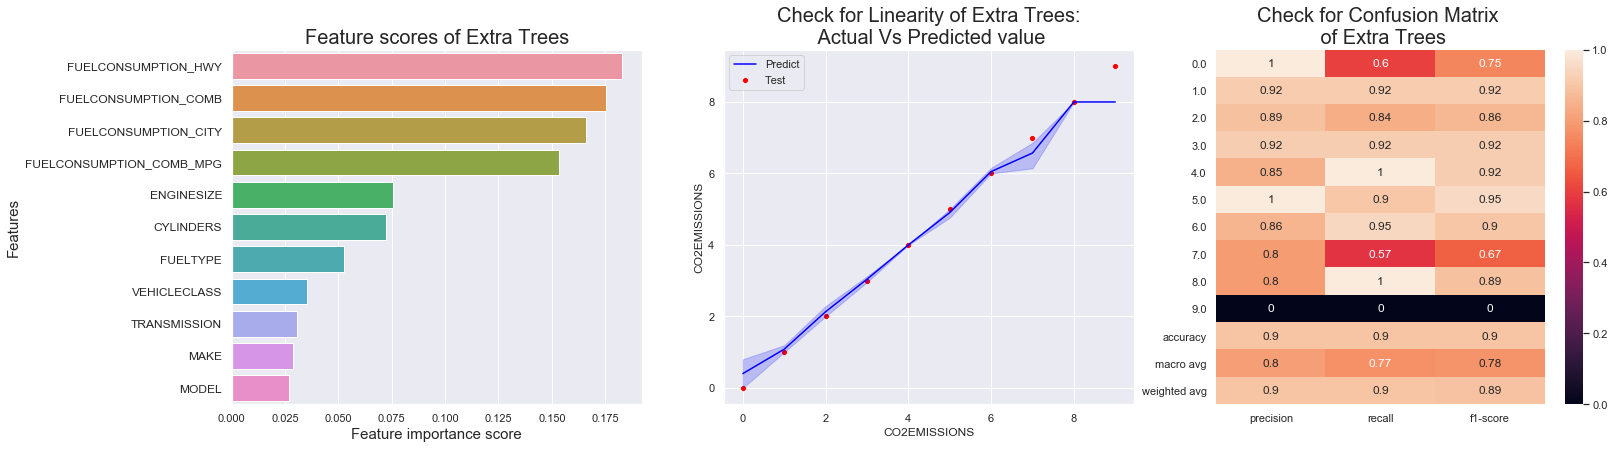

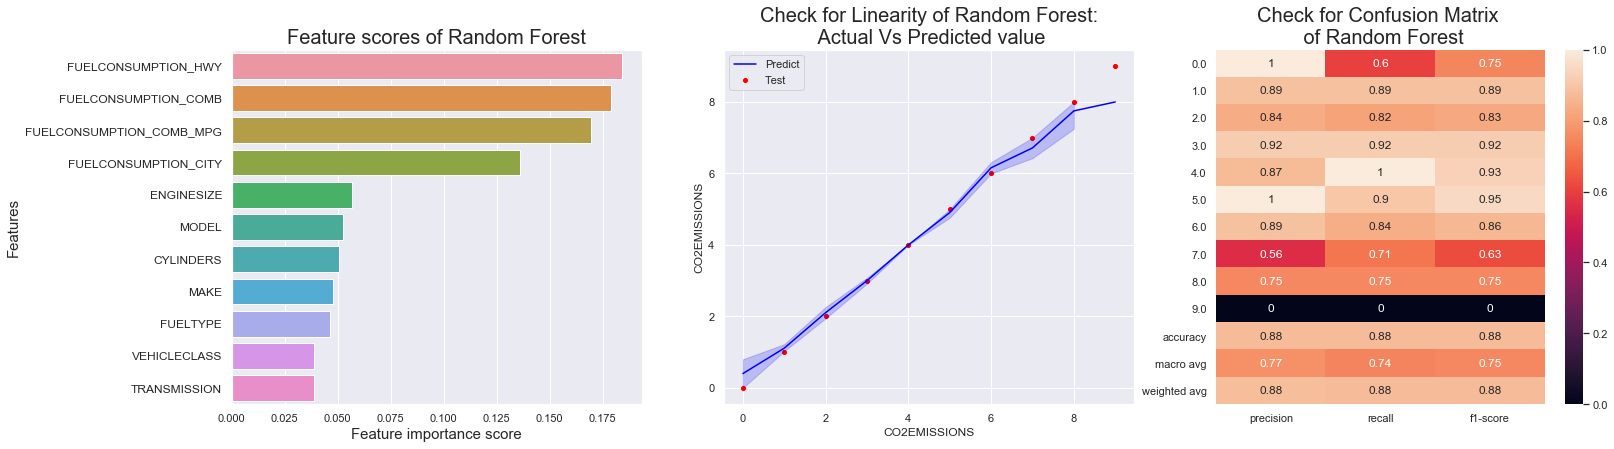

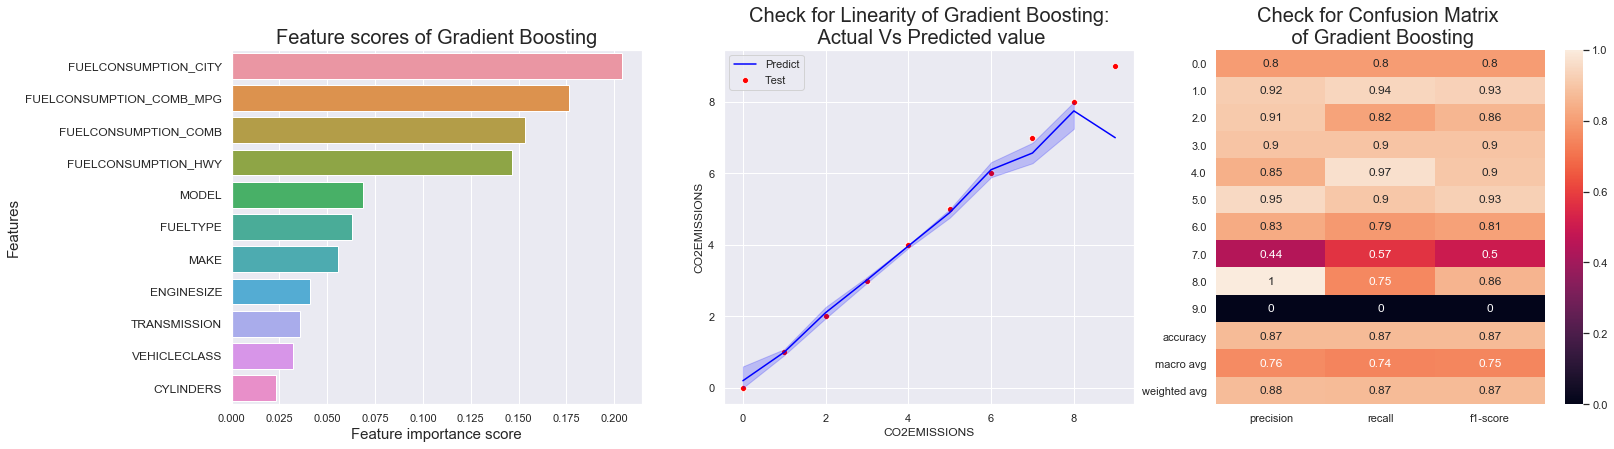

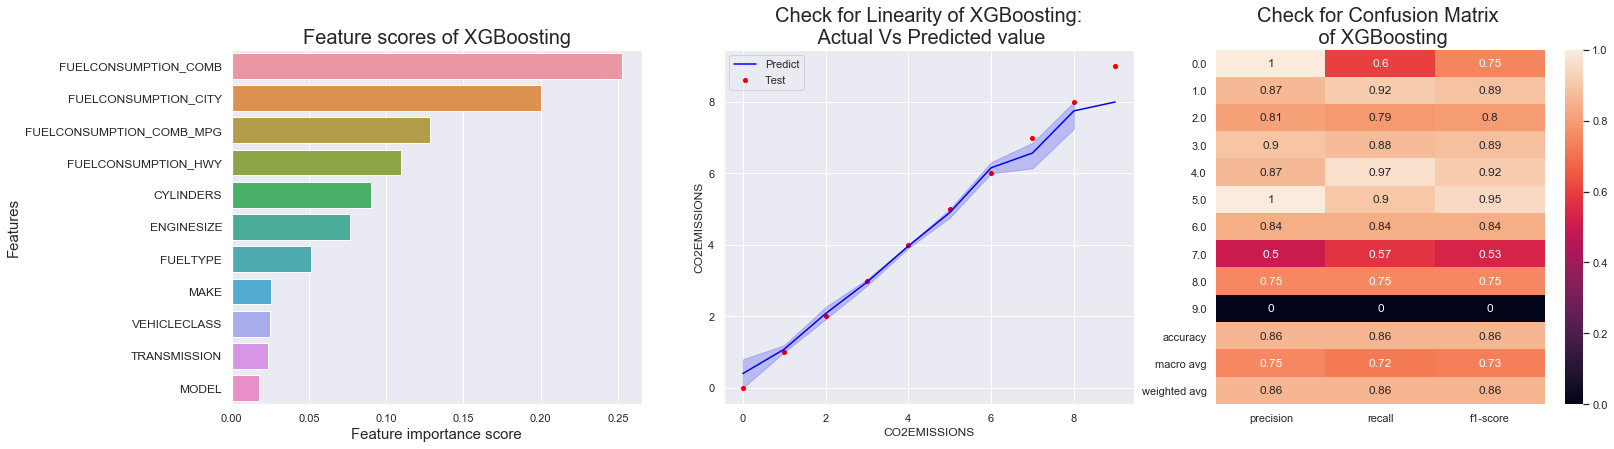

In [46]:
compare_clf(Xc_train,yc_train,Xc_test,yc_test)

In [239]:
Comparison_clf = pd.DataFrame({'Model': Model_clf_name,
                               'Roc_Auc_Macro': Roc_Auc_Macro,
                               'F1_Macro': F1_Macro,
                               'F1_Micro': F1_Micro})
print("FOLLOWING ARE THE SCORES: ")
Comparison_clf

FOLLOWING ARE THE SCORES: 


,Model,Roc_Auc_Macro,F1_Macro,F1_Micro
0,Extra Trees,0.992720,0.777437,0.897196
1,Random Forest,0.991830,0.750529,0.878505
2,Gradient Boosting,0.969706,0.748947,0.873832
3,XGBoosting,0.985835,0.732060,0.859813


### Model Explanation
* The Extra Trees has the best scores over all, and these socres are high enough for applying the classification model. And and the Random Forest Model is also good with close socres to Extra Trees. And both of them have balanced feature importances to the features, even the weights of different models are slightly different.
* In real environmental analysis, the classification have better application because categorical features are more frequently available than the numeric features(it need special equipments to do the test), therefore both classification and  regression models should be applied and work together for best predictions.